In [1]:
import torch

# Initial Code

In [4]:
!nvidia-smi

Sat Nov 30 16:22:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.17                 Driver Version: 561.17         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              5W /   35W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip uninstall torch


^C


In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 1.9 MB/s eta 0:24:12
     ---------------------------------------- 0.0/2.7 GB 1.9 MB/s eta 0:23:14
     ---------------------------------------- 0.0/2.7 GB 2.1 MB/s eta 0:21:27
     ---------------------------------------- 0.0/2.7 GB 2.2 MB/s eta 0:20:18
     ---------------------------------------- 0.0/2.7 GB 2.1 MB/s eta 0:21:06
     ---------------------------------------- 0.0/2.7 GB 2.2 MB/s eta 0:20:22
     ---------------------------------------- 0.0/2.7 GB 2.3 MB/s eta 0:19:10
     ---------------------------------------- 0.0/2.7 GB 2.4 MB/s eta 0:18:56
     ---------------------------------------- 0.0/2.7 GB 2.4 MB/s eta 0:18:26
     ---------------------------------------- 0.0/2.7 GB 2.4 MB/s et

In [2]:
import torch

In [3]:
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1650 Ti with Max-Q Design


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [16]:
# Feature Importance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

In [42]:
# Loading Data "Radiomics_data.csv" 

df = pd.read_csv("Radiomics_data.csv")

if df.isnull().sum().any():
    print("Missing values detected. Filling missing values with the mean of the columns.")
    df.fillna(df.mean(), inplace=True)

Correlation Matrix:
                                                      Gender  Age at Diag  \
Gender                                              1.000000     0.027048   
Age at Diag                                         0.027048     1.000000   
Smoking status - Current                            0.011611    -0.125332   
Smoking status - Former                            -0.040076     0.231419   
Smoking status                                      0.066149    -0.012362   
Smoking status.1                                    0.020825    -0.117922   
Smoking status (Packs-Years)                        0.014449     0.204138   
Tumor laterality - 0S                               0.017357     0.075886   
Tumor laterality - L                               -0.084359    -0.008655   
Tumor laterality - Midline                          0.017985    -0.036796   
Tumor laterality - R                                0.075360     0.004288   
Cancer subsite of origin - 0S                       0.07

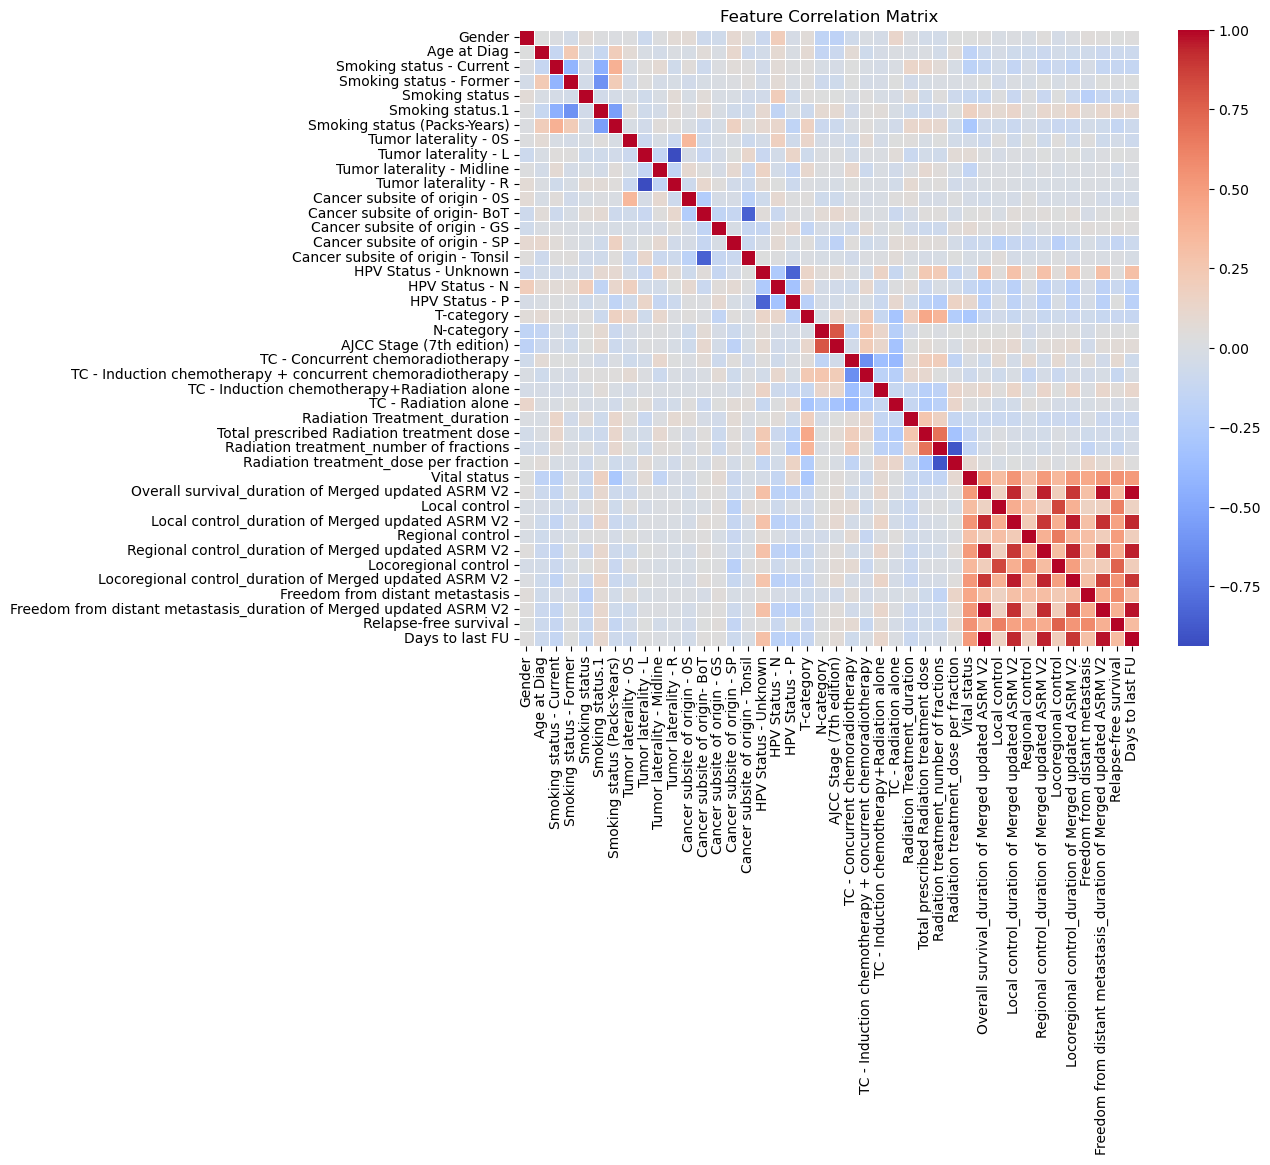

In [43]:
# Correlation Matrix for Features

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Running Lasso with alpha=0.01 and max_iter=5000


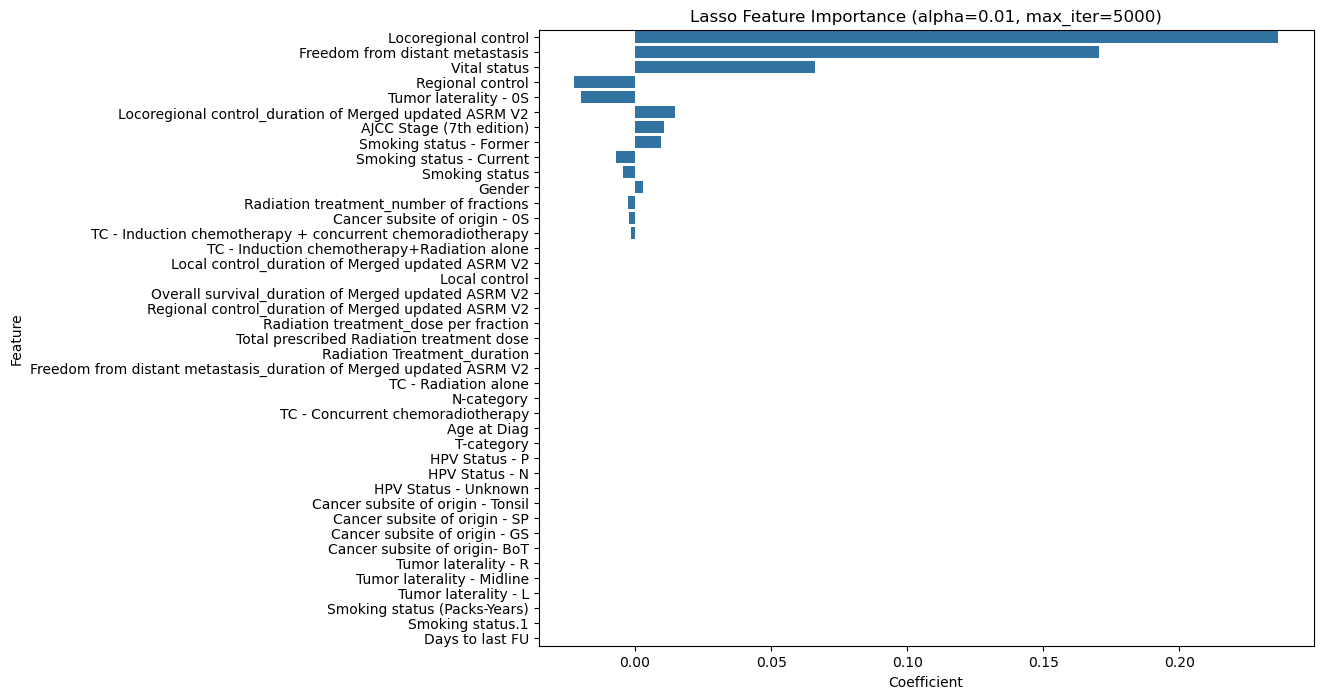


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -0

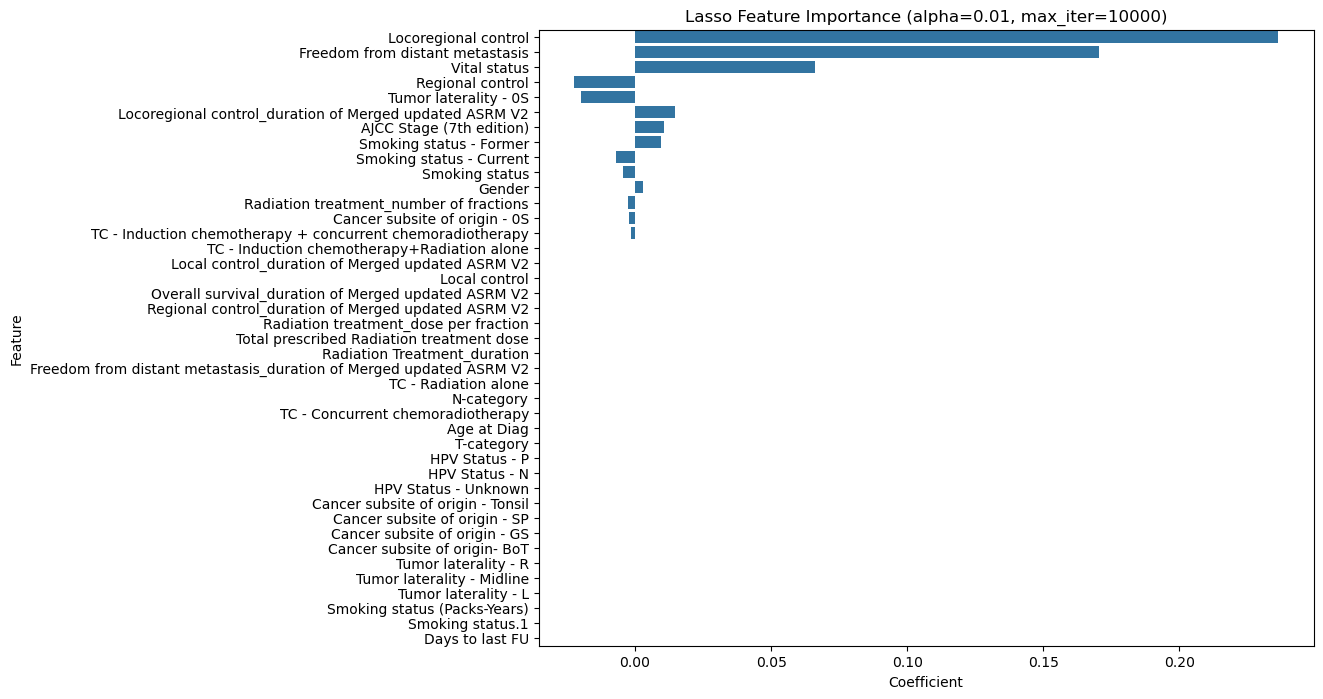


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -

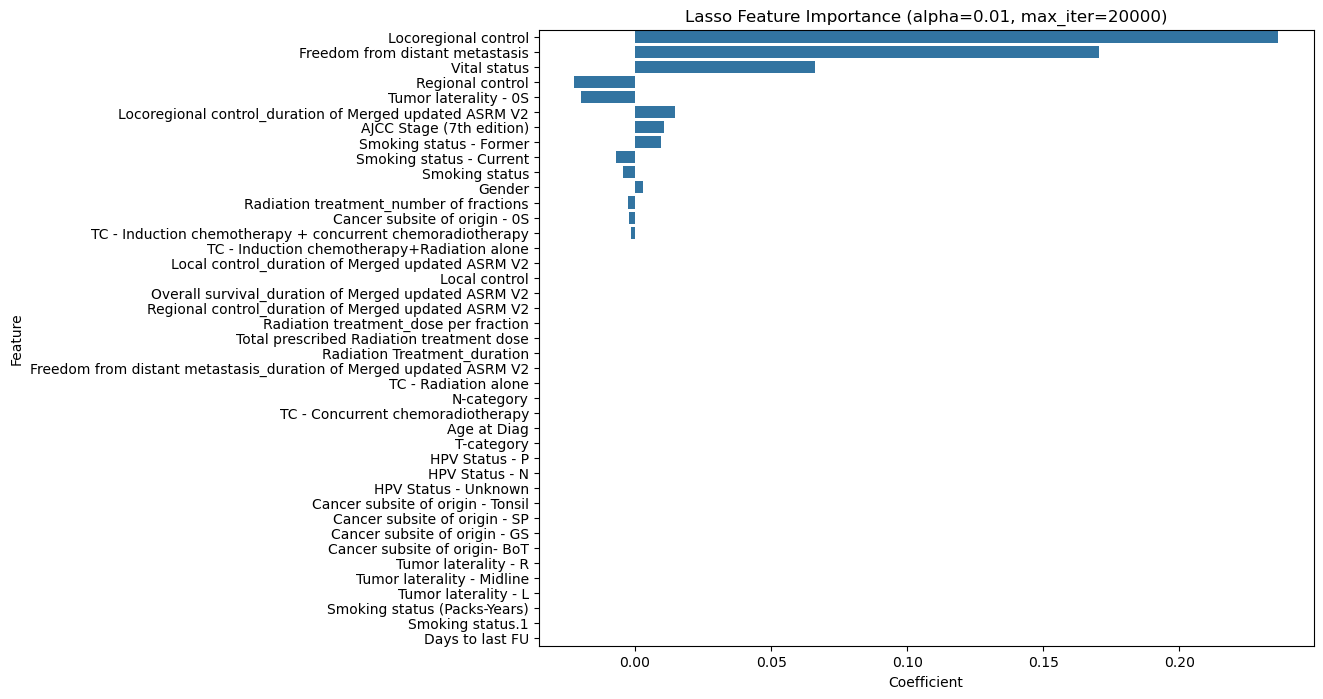


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -

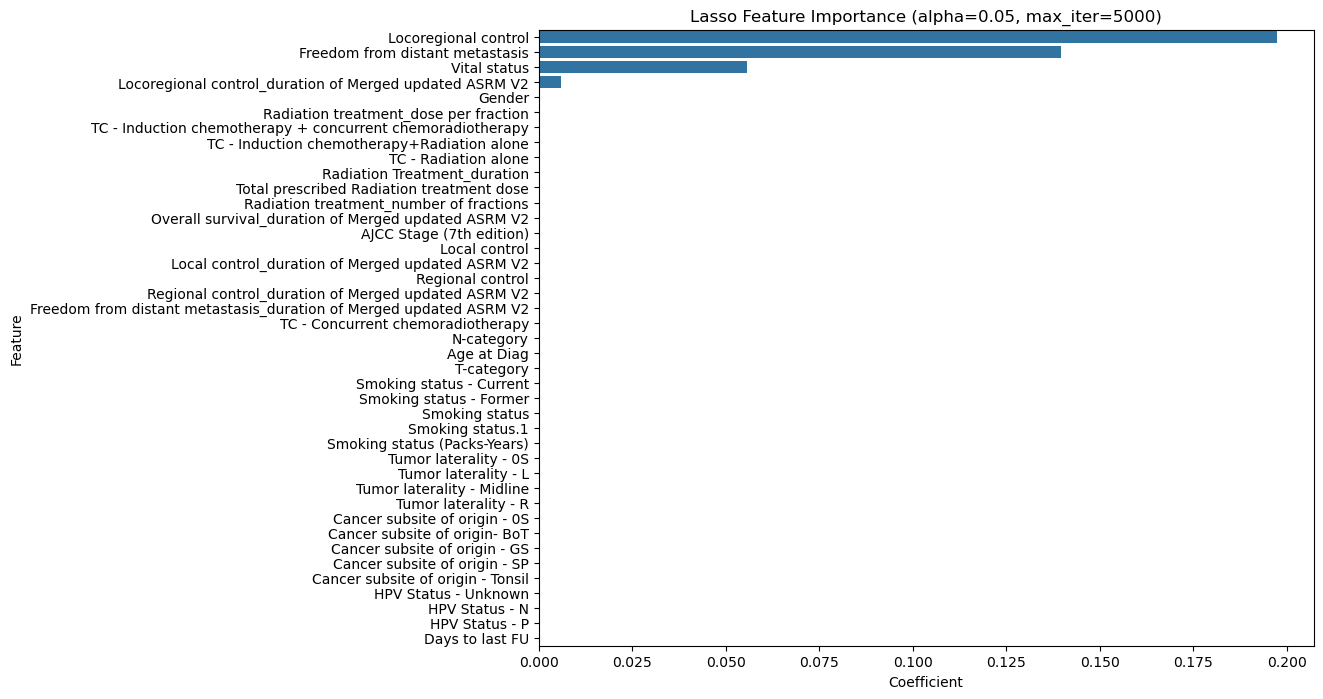


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


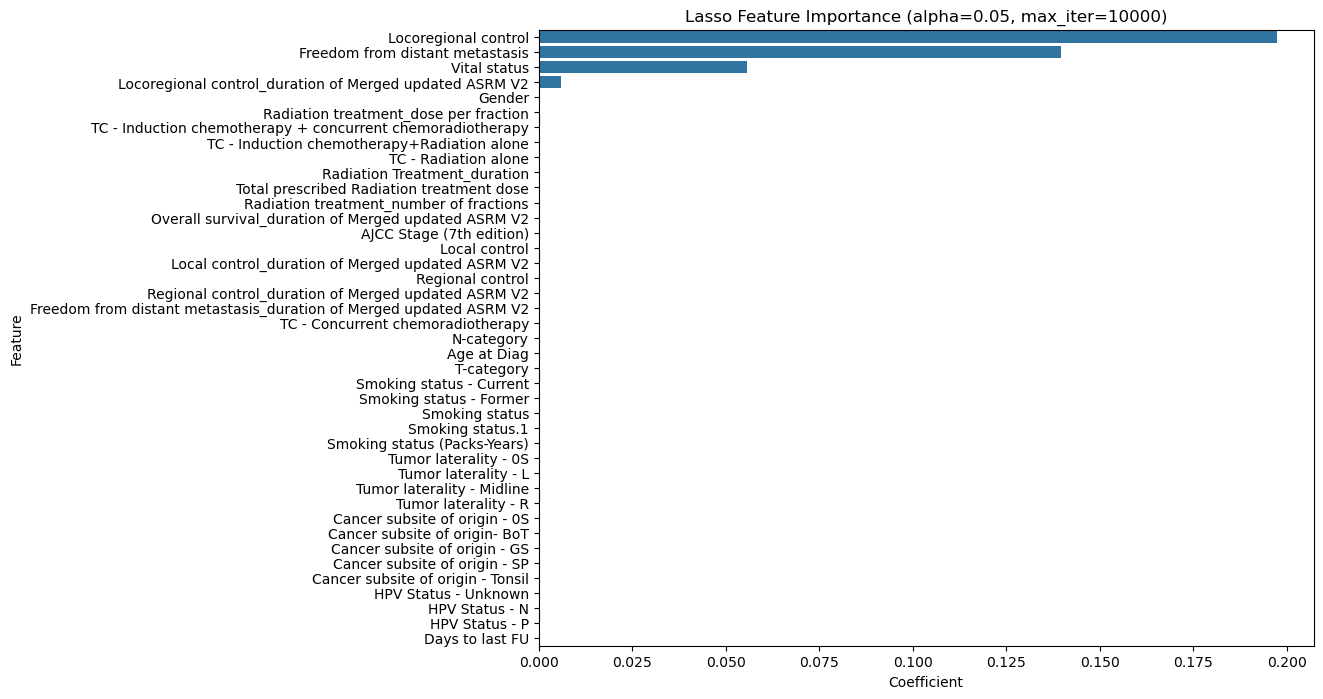


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


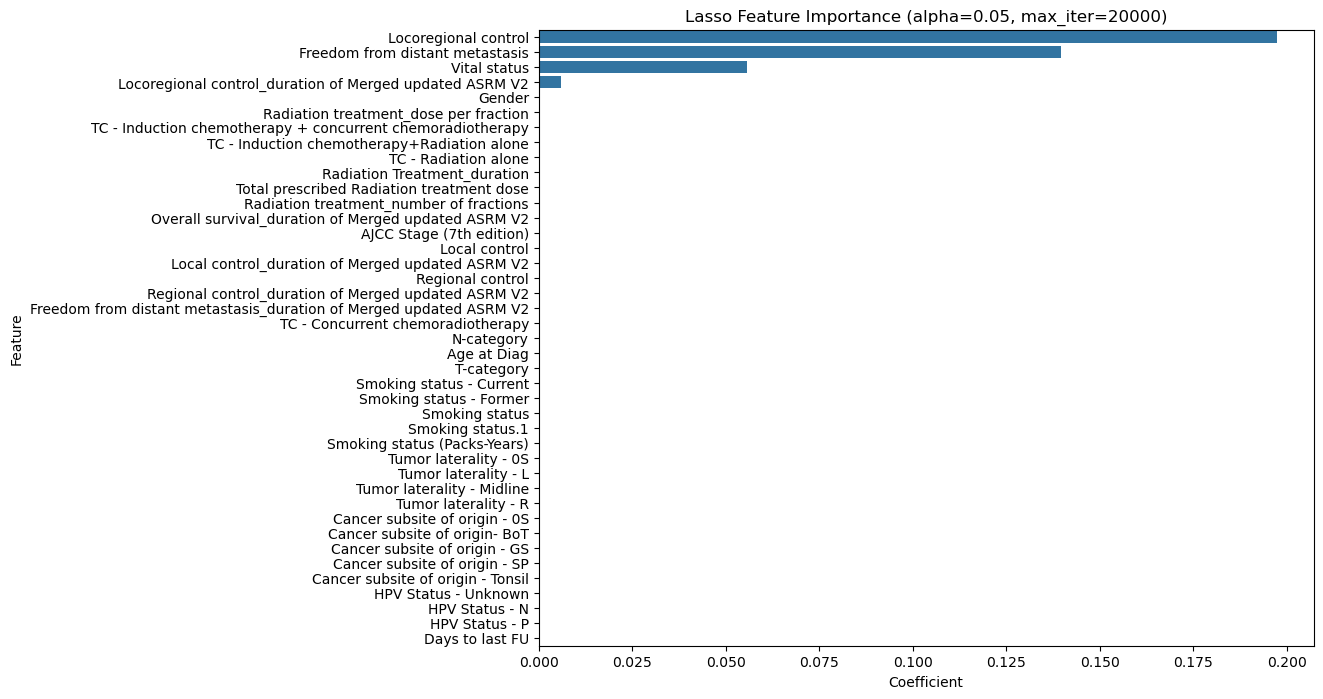


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------



In [76]:
# Feature importance using Lasso Regression for "Relapse-free survival"

target_column = 'Relapse-free survival'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Running Lasso with alpha=0.01 and max_iter=5000


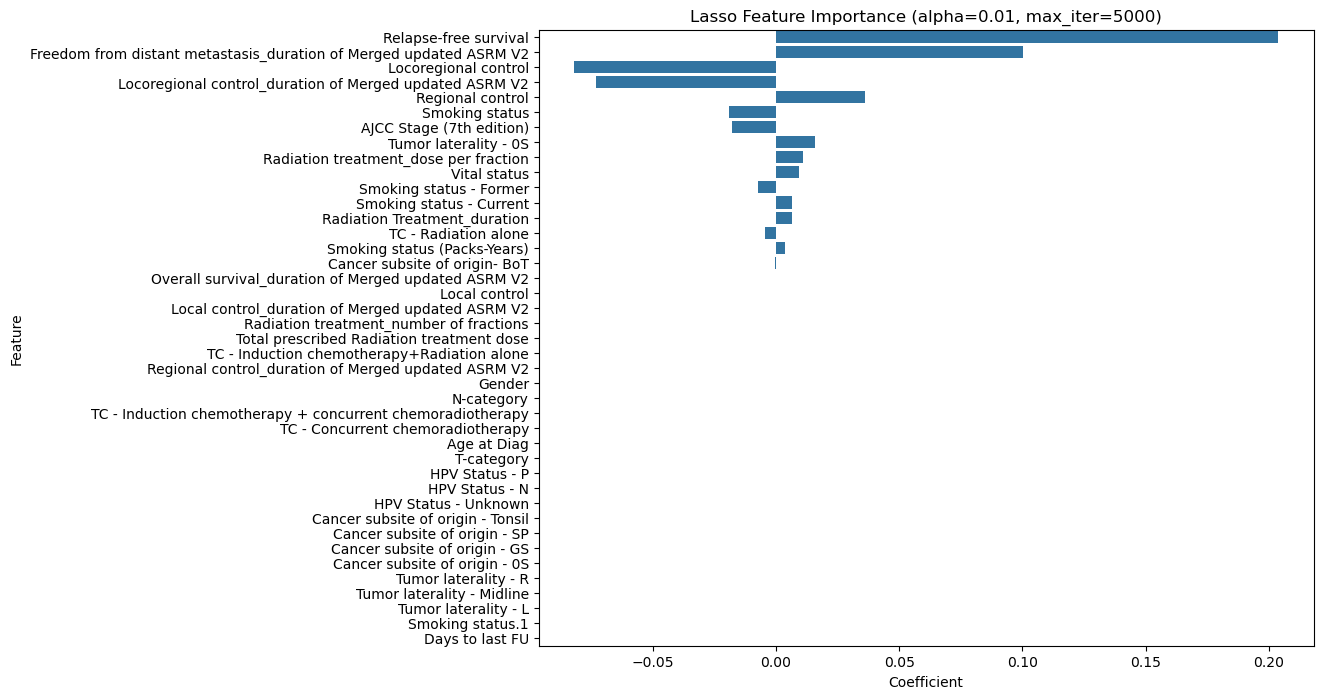


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     0

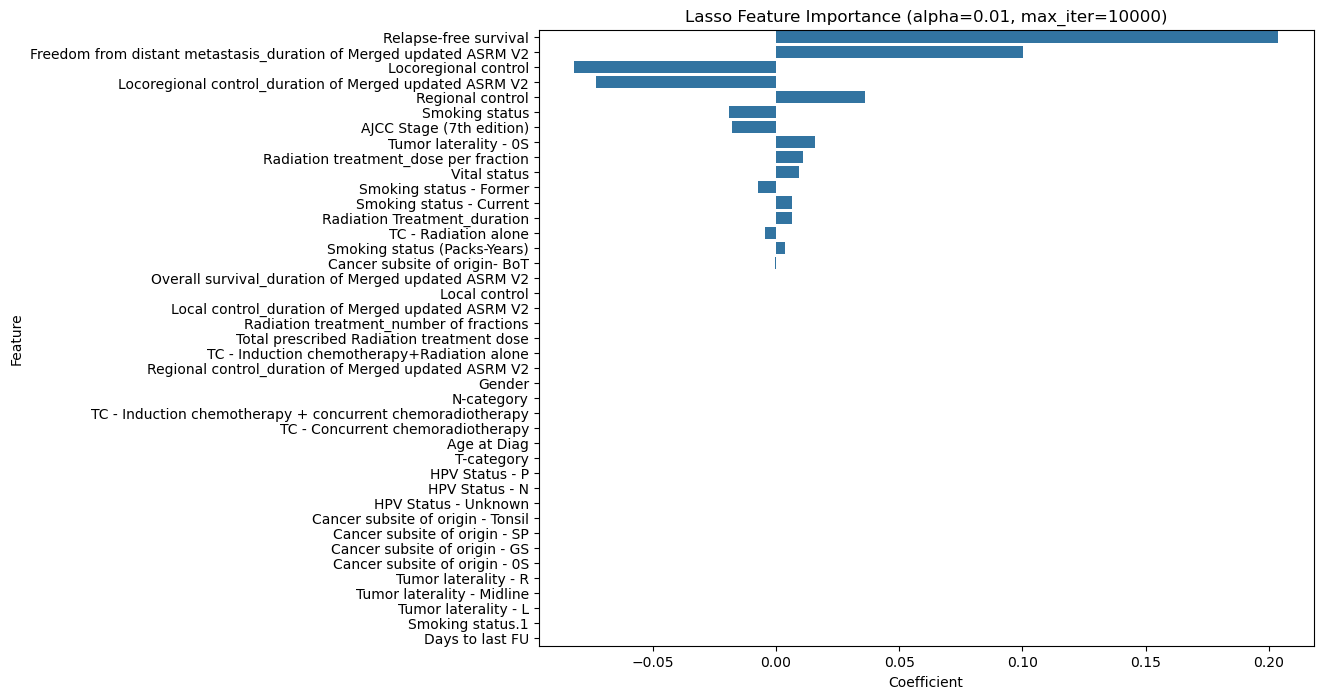


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     

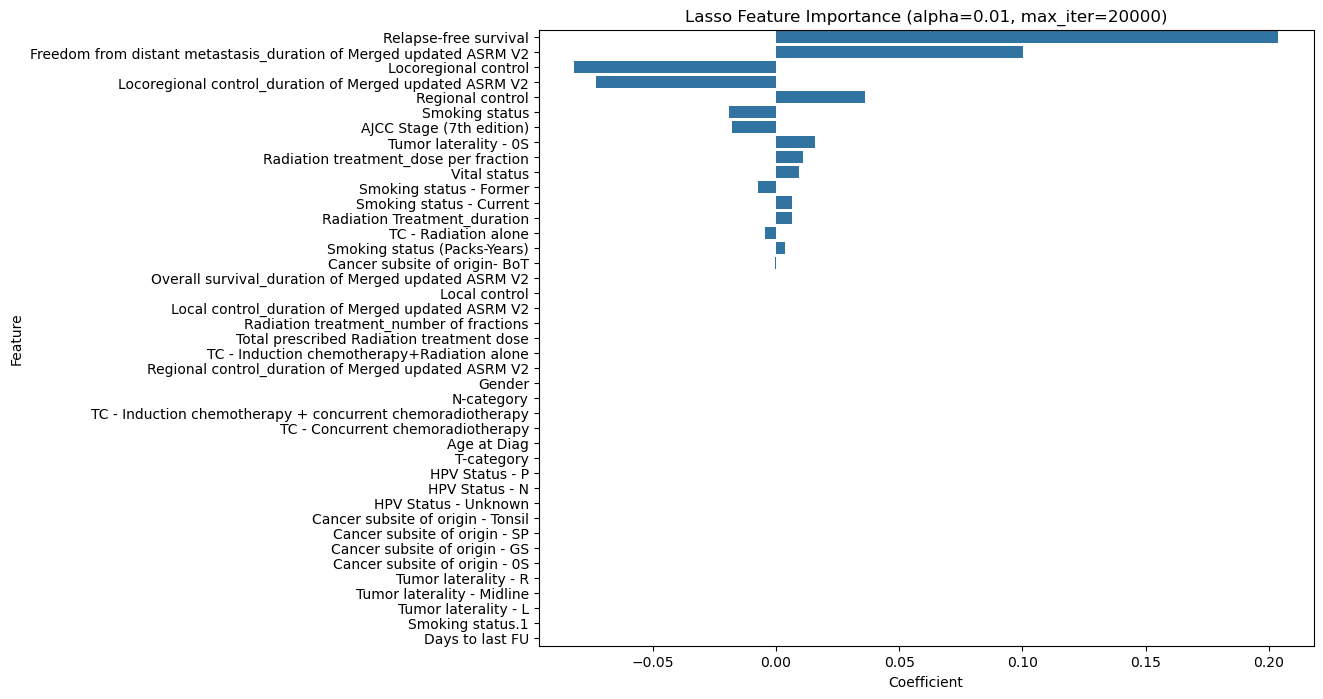


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     

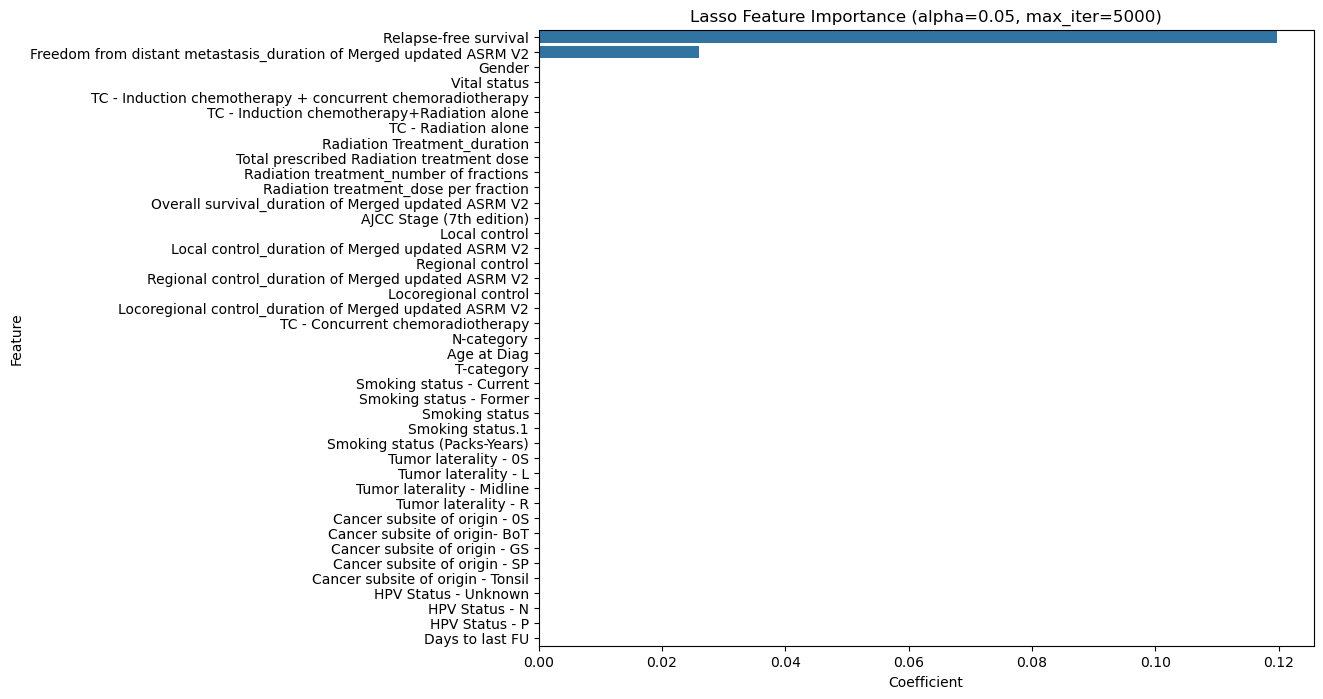


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


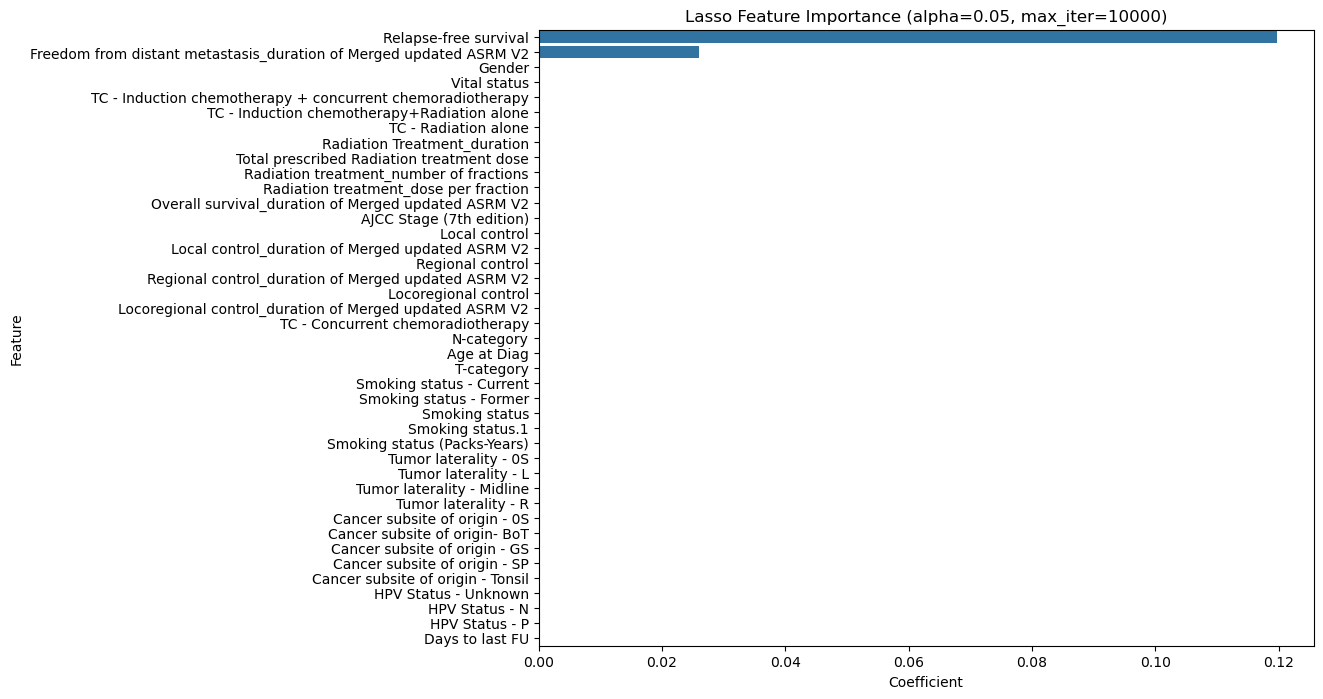


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


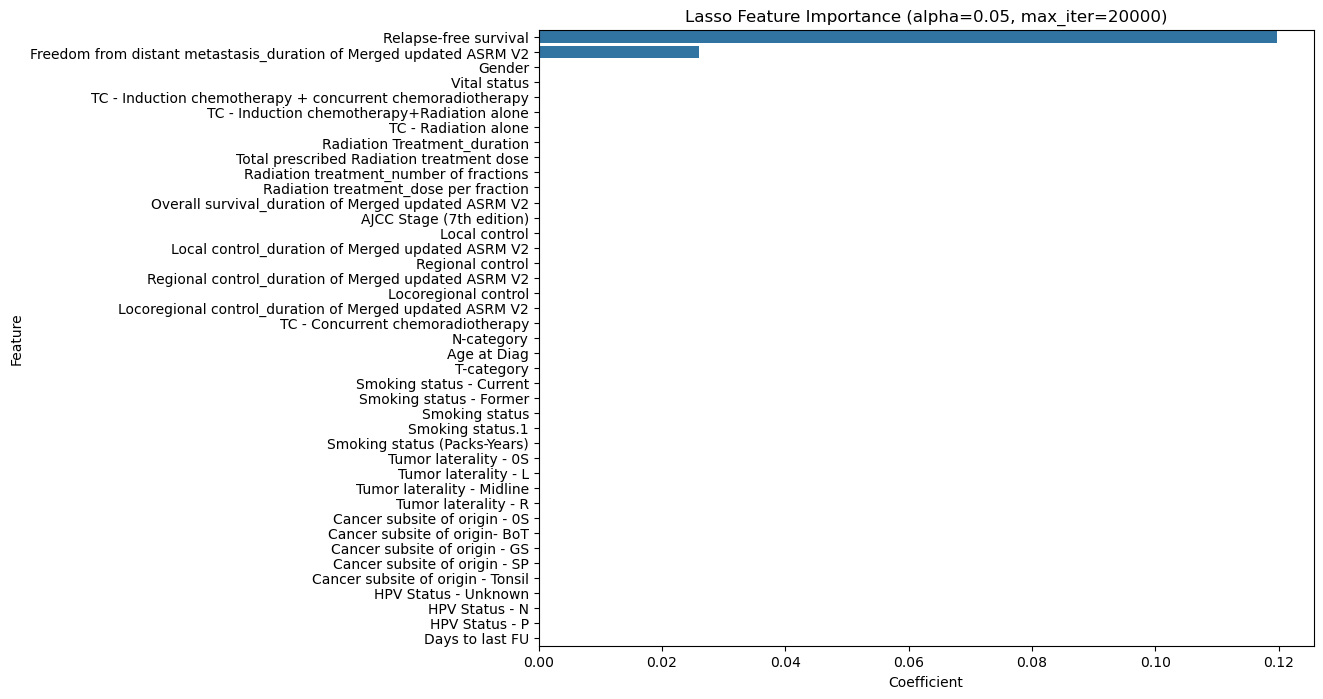


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------



In [79]:
# Feature importance using Lasso Regression for "Freedom from distant metastasis"

target_column = 'Freedom from distant metastasis'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Running Lasso with alpha=0.01 and max_iter=5000


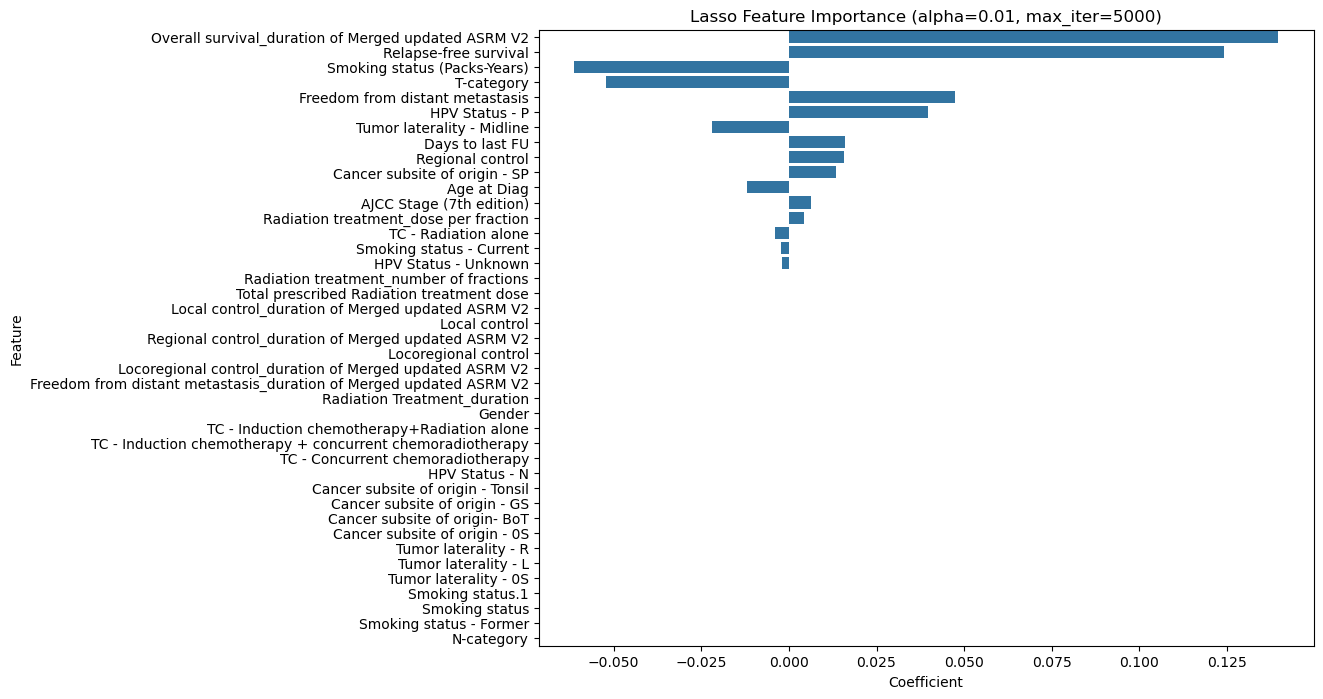


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     0

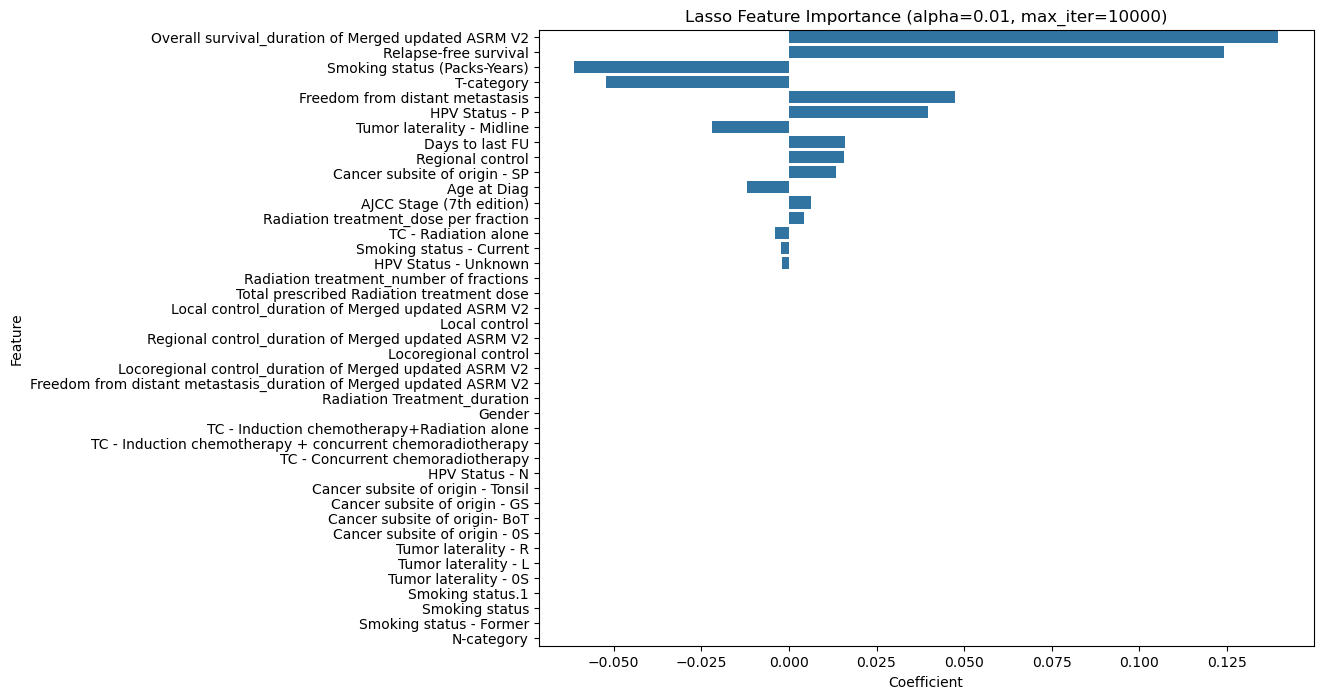


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     

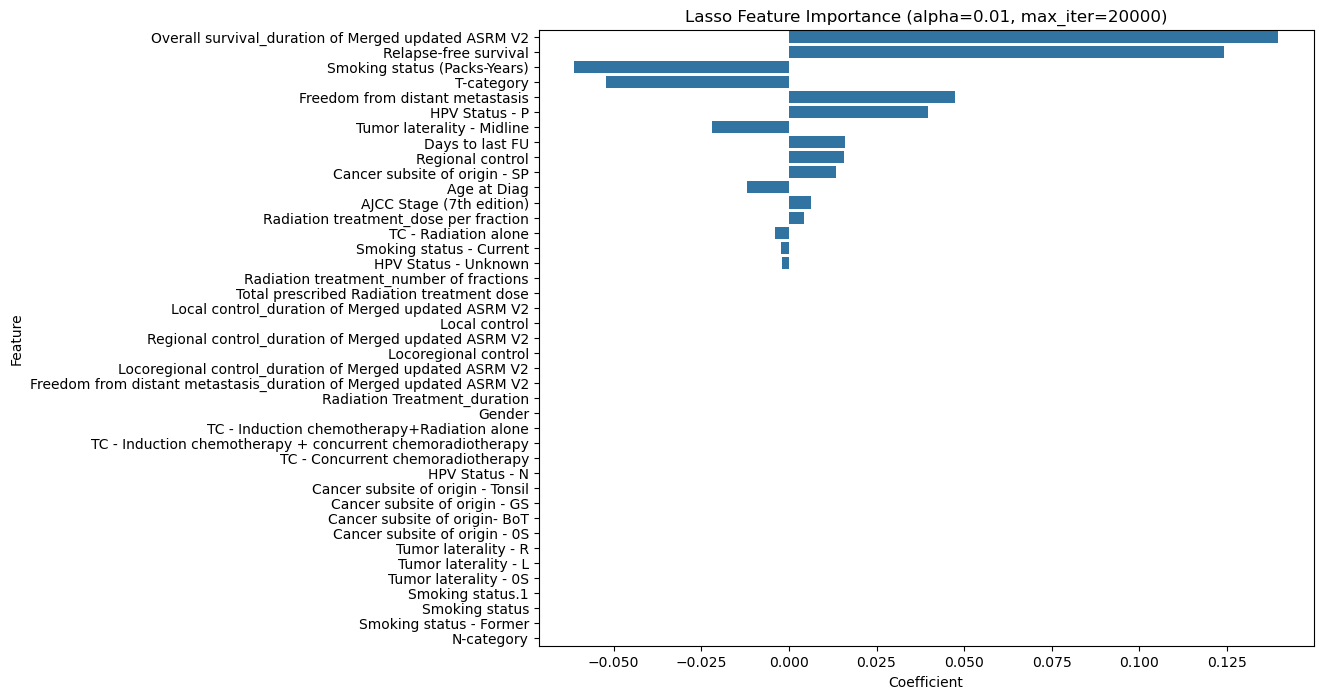


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     

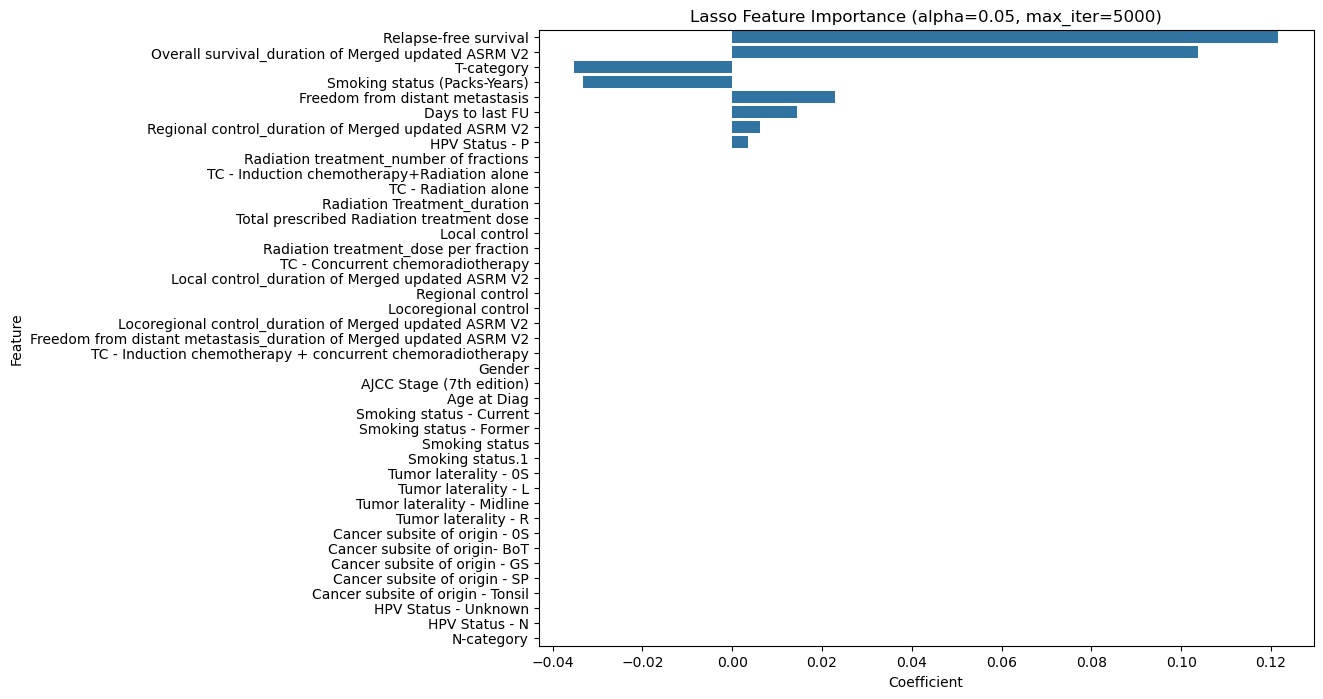


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


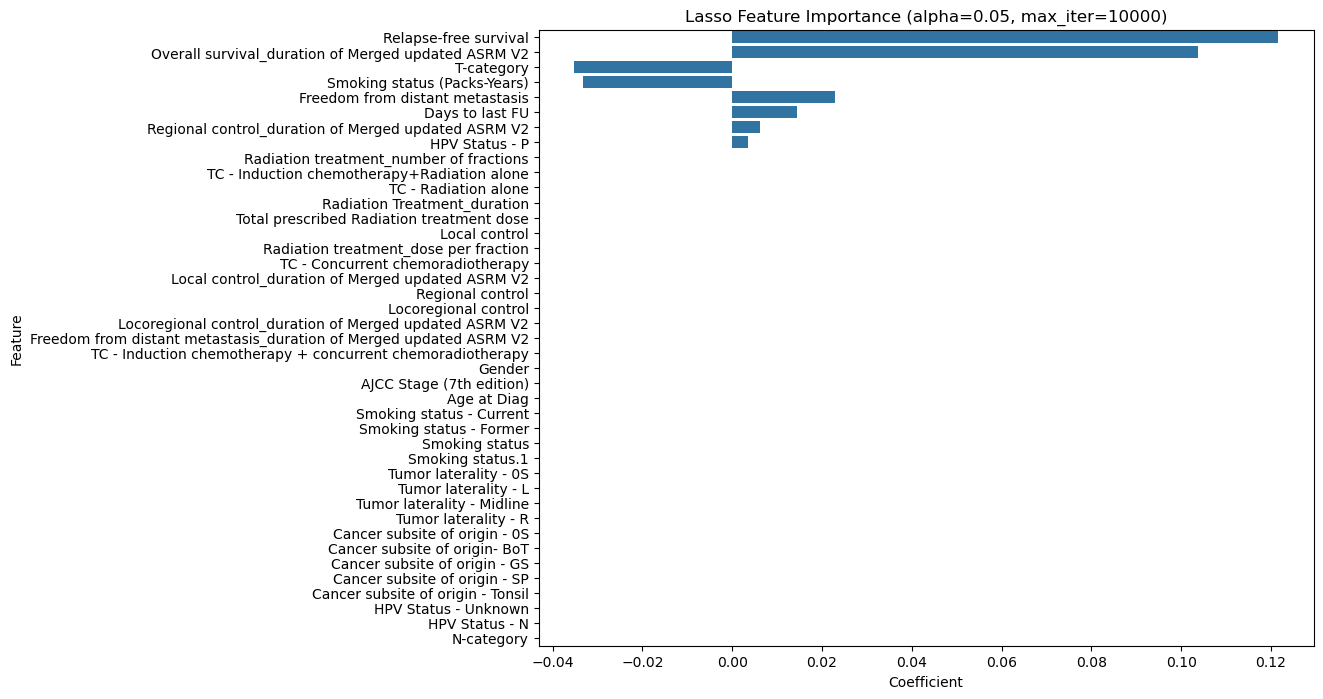


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


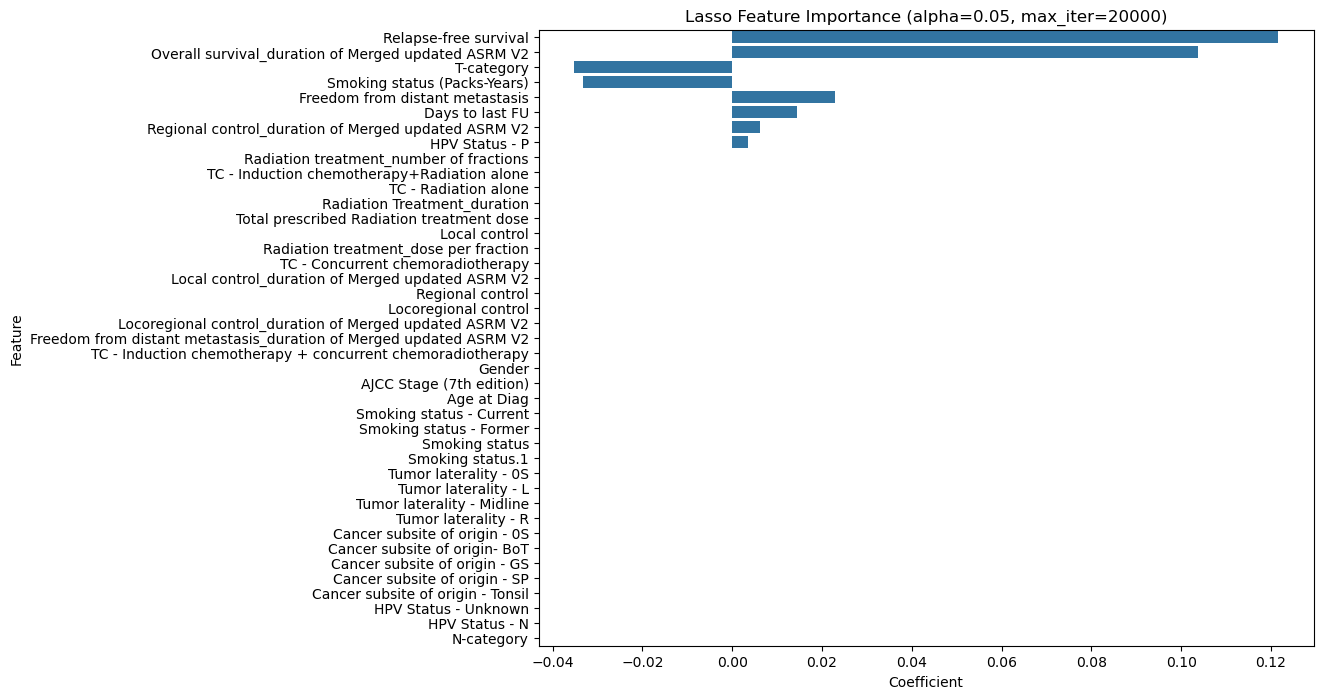


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------



In [81]:
# Feature importance using Lasso Regression for "Vital status"

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.9697
Train AUC: 1.0000
Test AUC: 0.9988

XGBoost Feature Importance:
                                              Feature  Importance
36                               Locoregional control    0.387115
38                    Freedom from distant metastasis    0.285776
30                                       Vital status    0.063792
18                                     HPV Status - P    0.023965
3                             Smoking status - Former    0.020846
2                            Smoking status - Current    0.018215
16                               HPV Status - Unknown    0.015347
28            Radiation treatment_number of fractions    0.014661
35  Regional control_duration of Merged updated AS...    0.014355
31  Overall survival_duration of Merged updated AS...    0.013988
15                  Cancer subsite of origin - Tonsil    0.013677
37  Locoregional control_duration of Merged update...    0.013

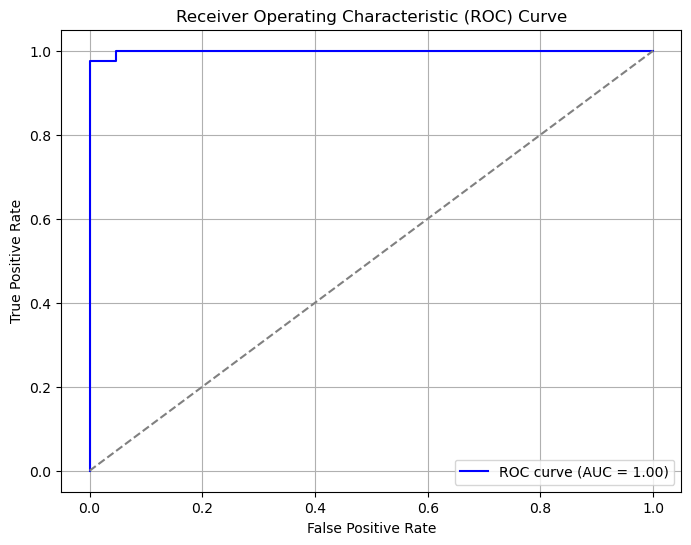

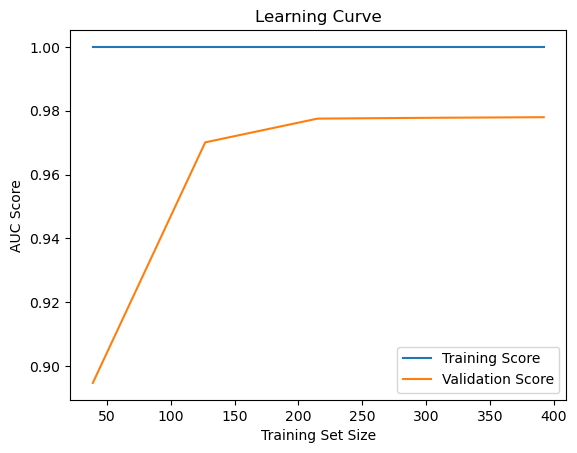

In [4]:
# Feature importance using XGBoost for "Relapse-free survival"

target_column = 'Relapse-free survival'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.9596
Train AUC: 1.0000
Test AUC: 0.9946

XGBoost Feature Importance:
                                              Feature  Importance
39                              Relapse-free survival    0.444839
38  Freedom from distant metastasis_duration of Me...    0.038920
6                        Smoking status (Packs-Years)    0.034877
21                           AJCC Stage (7th edition)    0.033518
36                               Locoregional control    0.033261
31  Overall survival_duration of Merged updated AS...    0.031928
12                      Cancer subsite of origin- BoT    0.029894
37  Locoregional control_duration of Merged update...    0.028450
33   Local control_duration of Merged updated ASRM V2    0.028285
29              Radiation treatment_dose per fraction    0.027337
2                            Smoking status - Current    0.026804
5                                    Smoking status.1    0.025

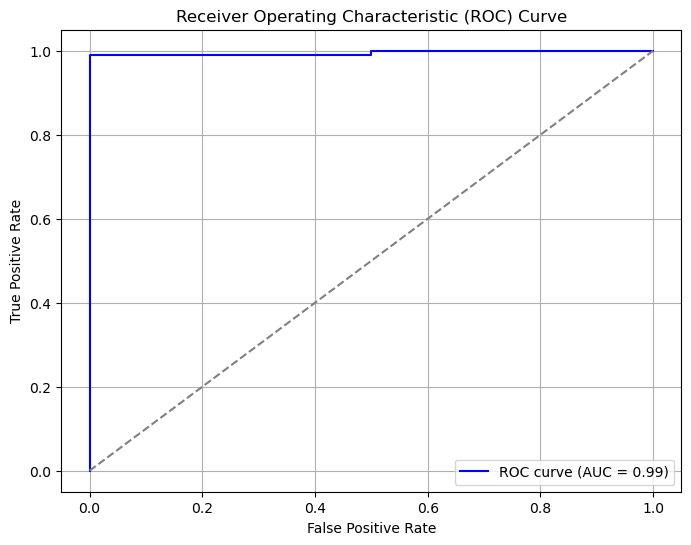

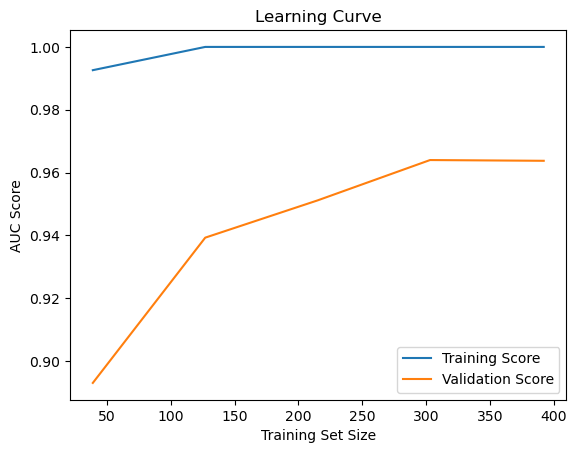

In [5]:
# Feature importance using XGBoost for "Freedom from distant metastasis"

target_column = 'Freedom from distant metastasis'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

# Vital Status - XGBoost

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.9293
Train AUC: 1.0000
Test AUC: 0.8749

XGBoost Feature Importance:
                                              Feature  Importance
36  Locoregional control_duration of Merged update...    0.140336
32   Local control_duration of Merged updated ASRM V2    0.134081
39                              Relapse-free survival    0.125153
19                                         T-category    0.052963
17                                     HPV Status - N    0.038565
30  Overall survival_duration of Merged updated AS...    0.037320
6                        Smoking status (Packs-Years)    0.034391
20                                         N-category    0.032839
8                                Tumor laterality - L    0.030406
26                       Radiation Treatment_duration    0.029157
11                      Cancer subsite of origin - 0S    0.027827
38  Freedom from distant metastasis_duration of Me...    0.027

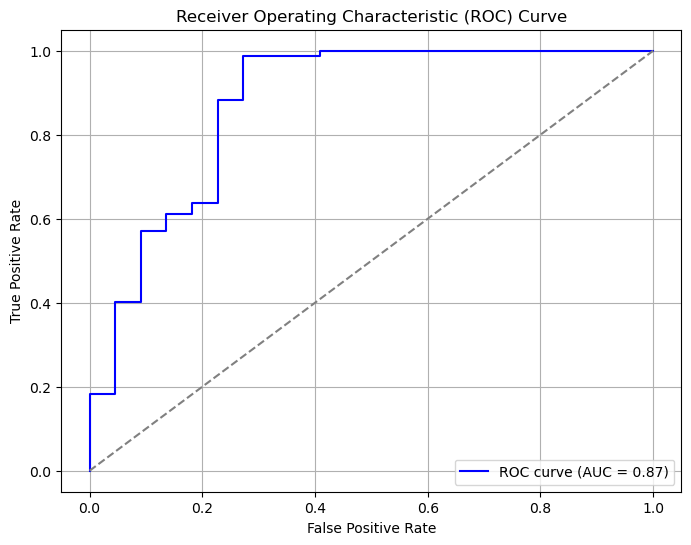

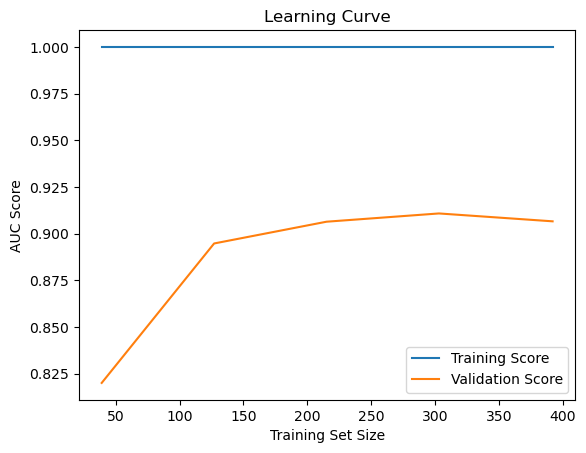

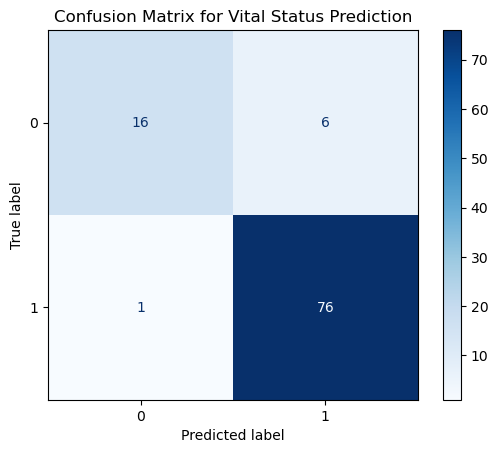

In [46]:
# Feature importance using XGBoost for "Vital status"

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50}
Training Accuracy of XGBoost Model: 0.9566
Test Accuracy of XGBoost Model: 0.9091
Train AUC: 0.9916
Test AUC: 0.8725

XGBoost Feature Importance:
                                              Feature  Importance
36  Locoregional control_duration of Merged update...    0.260725
32   Local control_duration of Merged updated ASRM V2    0.187660
39                              Relapse-free survival    0.133305
34  Regional control_duration of Merged updated AS...    0.046106
19                                         T-category    0.033825
30  Overall survival_duration of Merged updated AS...    0.033788
20                                         N-category    0.032151
6                        Smoking status (Packs-Years)    0.030338
29              Radiation treatment_dose per fraction    0.021518
23  TC - Induction chemotherapy + concurrent chemo...    0.021104
38  Freedom from distant meta

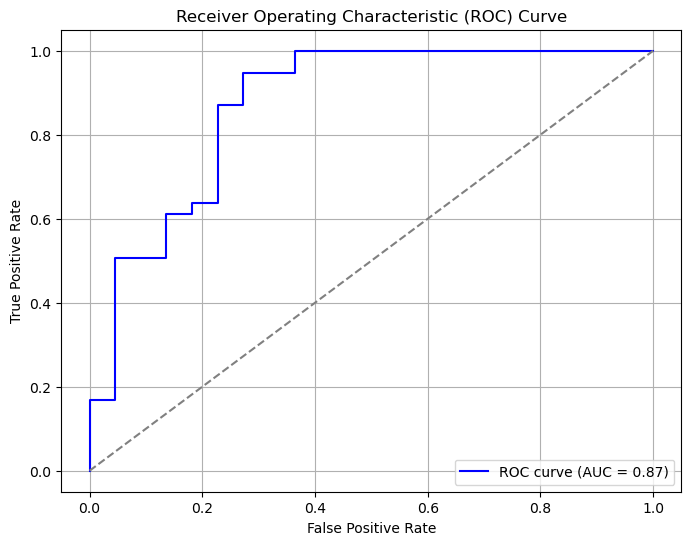

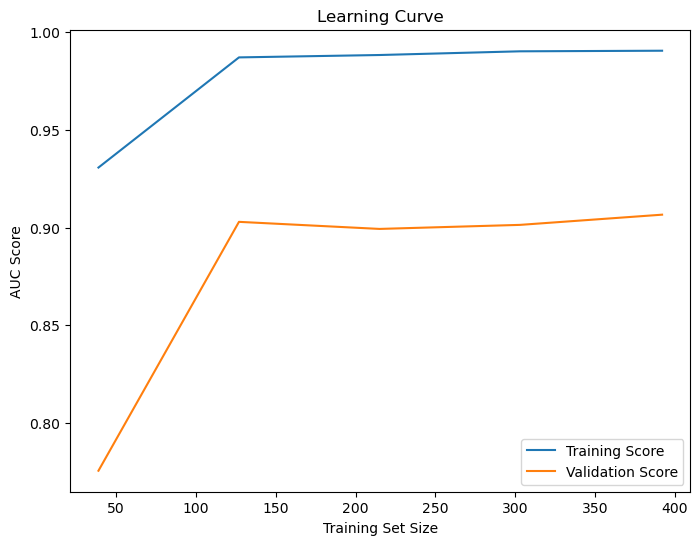

<Figure size 800x600 with 0 Axes>

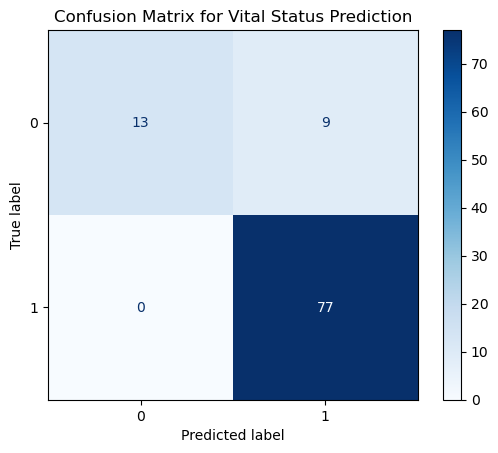

In [54]:
# Feature importance using XGBoost for "Vital status" with GridSearch

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
import pandas as pd
import matplotlib.pyplot as plt

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Create the base model
xgb_model = xgb.XGBClassifier(random_state=42)

# Perform GridSearch
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

# Calculate AUC scores
train_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature importance
importances = best_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

# ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='roc_auc')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

# Logistic Regression Tr acc = 0.91, Test Acc = 0.899

Training Accuracy: 0.9133
Test Accuracy: 0.8990
Train AUC: 0.9425
Test AUC: 0.8695

Feature Importance (ElasticNet Logistic Regression):
                                              Feature  Coefficient
39                              Relapse-free survival     0.750252
40                                    Days to last FU     0.598977
30  Overall survival_duration of Merged updated AS...     0.598977
37                    Freedom from distant metastasis     0.444617
18                                     HPV Status - P     0.334488
32   Local control_duration of Merged updated ASRM V2     0.295949
24        TC - Induction chemotherapy+Radiation alone     0.281443
27          Total prescribed Radiation treatment dose     0.278682
33                                   Regional control     0.261196
14                      Cancer subsite of origin - SP     0.239022
0                                              Gender     0.212430
21                           AJCC Stage (7th edition)     0

C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


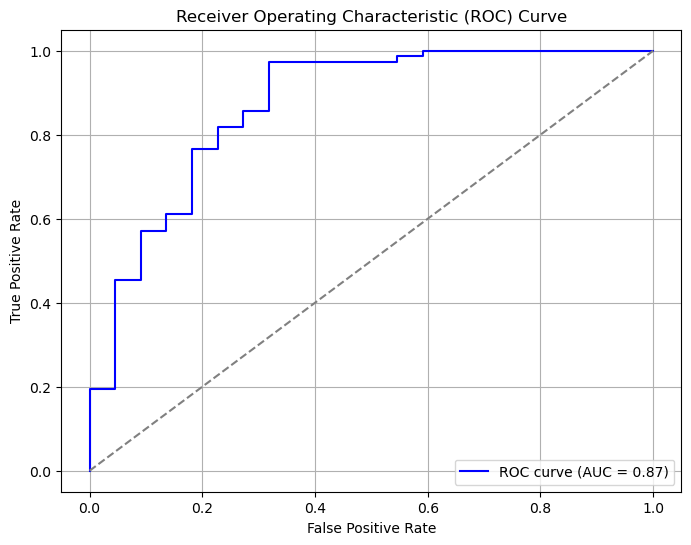

C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\s

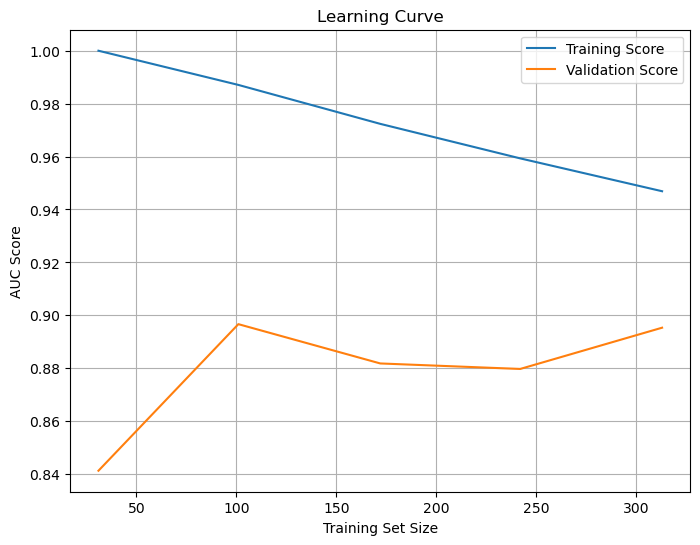

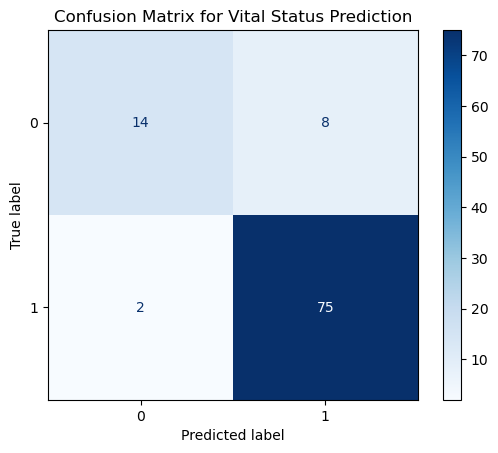

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the target column and split data
target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with ElasticNet (L1 + L2 regularization)
model = LogisticRegression(
    penalty='elasticnet', 
    solver='saga',  # Required solver for ElasticNet penalty
    l1_ratio=0.5,   # Mix of L1 (Lasso) and L2 (Ridge), where 0.5 is an equal mix
    C=0.7,          # Regularization strength (inverse of lambda)
    random_state=42
)

# Fit the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (ElasticNet Logistic Regression):")
print(coefficients)

# ROC Curve
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5, scoring='roc_auc'
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

# Decision Tree

Training Accuracy: 1.0000
Test Accuracy: 0.8990
Train AUC: 1.0000
Test AUC: 0.8878


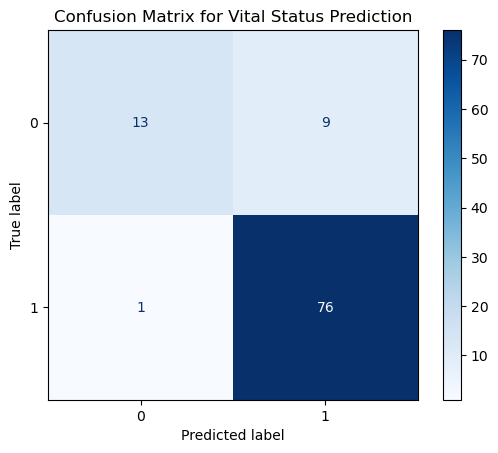

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=13, random_state=42)

# Initialize the Bagging Classifier
model = BaggingClassifier(
    estimator=base_estimator, 
    n_estimators=1690, 
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# For ROC-AUC, we need probabilities (BaggingClassifier supports predict_proba)
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

Training Accuracy: 1.0000
Test Accuracy: 0.9293
Train AUC: 1.0000
Test AUC: 0.8749
Train Precision: 1.0000
Test Precision: 0.9268
Train Recall: 1.0000
Test Recall: 0.9870


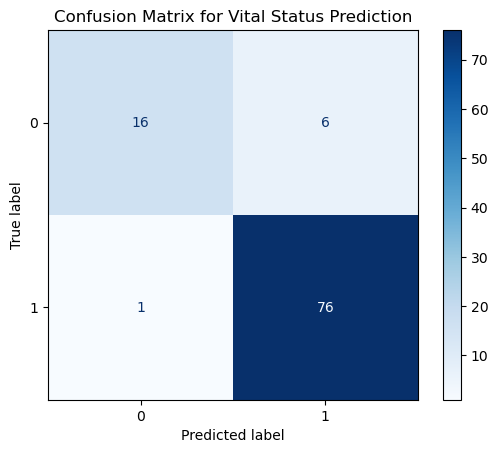


XGBoost Feature Importance:
                                              Feature  Importance
36  Locoregional control_duration of Merged update...    0.140336
32   Local control_duration of Merged updated ASRM V2    0.134081
39                              Relapse-free survival    0.125153
19                                         T-category    0.052963
17                                     HPV Status - N    0.038565
30  Overall survival_duration of Merged updated AS...    0.037320
6                        Smoking status (Packs-Years)    0.034391
20                                         N-category    0.032839
8                                Tumor laterality - L    0.030406
26                       Radiation Treatment_duration    0.029157
11                      Cancer subsite of origin - 0S    0.027827
38  Freedom from distant metastasis_duration of Me...    0.027656
29              Radiation treatment_dose per fraction    0.025644
34  Regional control_duration of Merged updated

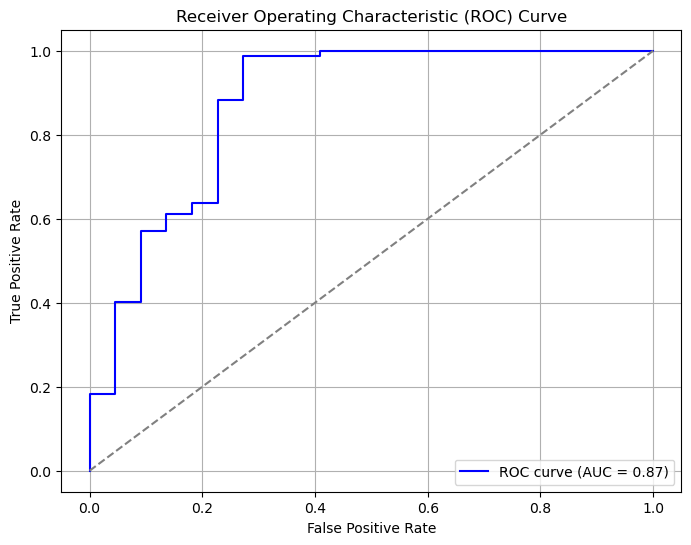

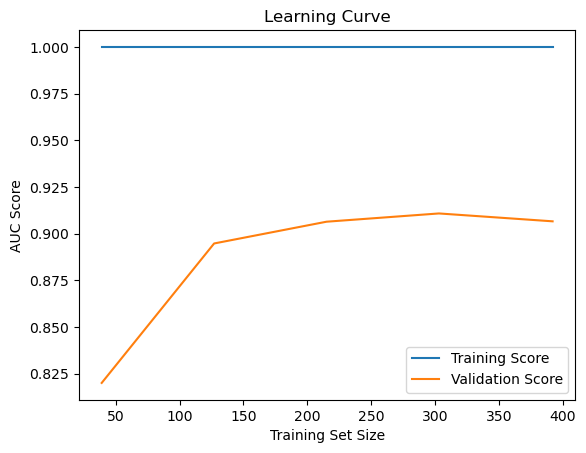

In [49]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, depending on the nature of features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate AUC Score
train_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Calculate Precision and Recall
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

# Feature Importance using XGBoost
importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Training Accuracy: 0.8801
Test Accuracy: 0.8485
Train AUC: 0.9767
Test AUC: 0.8973
Train Precision: 0.9345
Test Precision: 0.8974
Train Recall: 0.9064
Test Recall: 0.9091


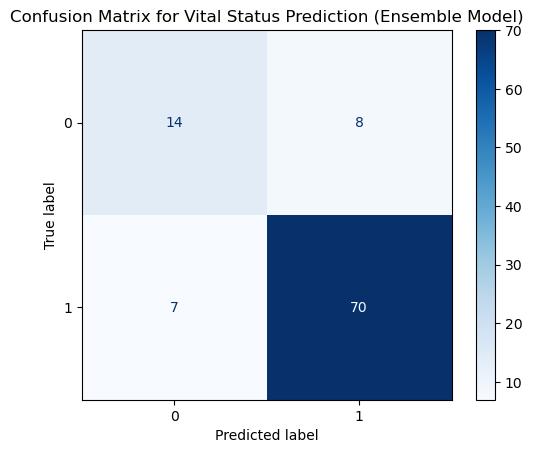

NotFittedError: need to call fit or load_model beforehand

In [50]:
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, depending on the nature of features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes
gnb_model = GaussianNB()

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)

# Create an ensemble of GNB and XGBoost using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('gnb', gnb_model),
    ('xgb', xgb_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train = ensemble_model.predict(X_train)
y_pred_test = ensemble_model.predict(X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate AUC Score
train_auc = roc_auc_score(y_train, ensemble_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Calculate Precision and Recall
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)

train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction (Ensemble Model)')
plt.show()

# Feature Importance using XGBoost (in the ensemble)
# XGBoost provides feature importance
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance (from Ensemble):")
print(feature_importance)

# ROC Curve
y_pred_prob = ensemble_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve for Ensemble Model')
plt.show()


Training Accuracy of Ensemble Model: 0.9974
Test Accuracy of Ensemble Model: 0.9091
Train AUC: 1.0000
Test AUC: 0.8920


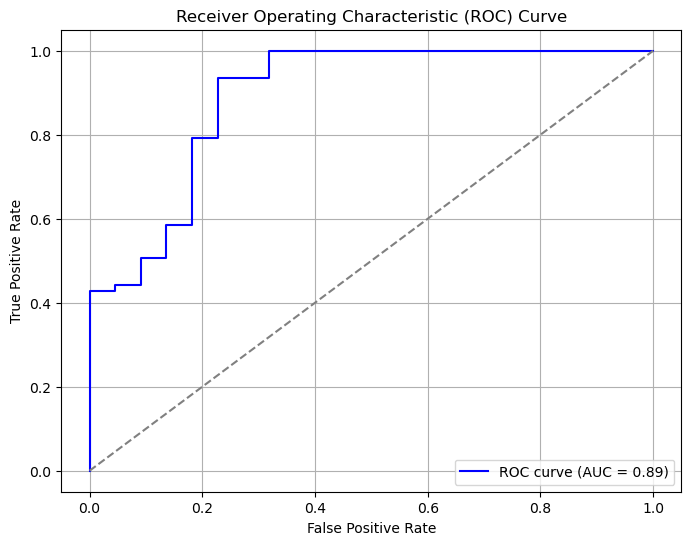

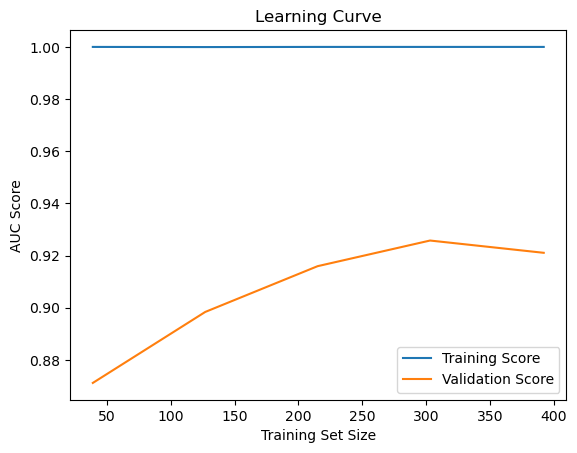

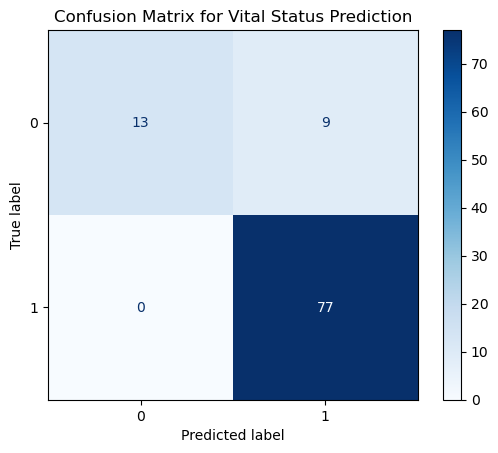

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
import xgboost as xgb

# Load and preprocess data
target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
xgb_model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Combine models in a VotingClassifier (hard voting for class labels, soft voting for probabilities)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('logistic', logistic_model),
        ('rf', rf_model)
    ],
    voting='soft'  # Use 'soft' for probabilities or 'hard' for majority voting
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = ensemble_model.predict(X_train)
y_pred_test = ensemble_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Ensemble Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Ensemble Model: {test_accuracy:.4f}")

# Calculate AUC
y_pred_prob_train = ensemble_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = ensemble_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_prob_train)
test_auc = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()



Training Accuracy of Ensemble Model: 1.0000
Test Accuracy of Ensemble Model: 0.9192
Train AUC: 1.0000
Test AUC: 0.8182


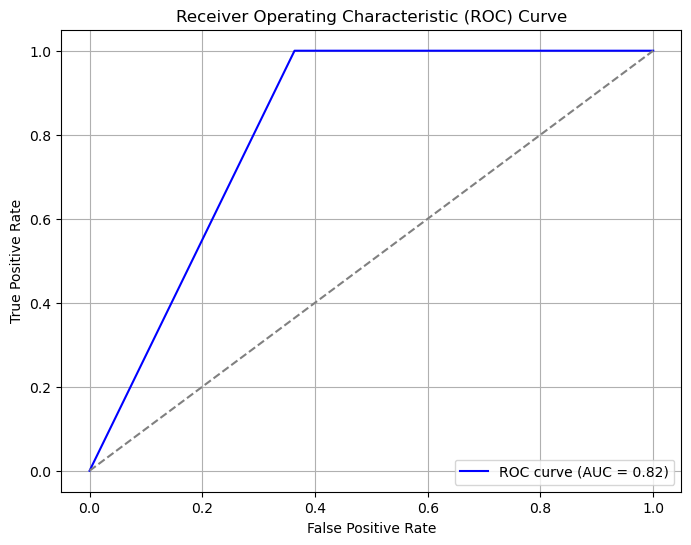

C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\metrics\_scorer.py", line 370, in _score
    response_method = _check_response_method(estimator, self._response_method)
                      ^^^^

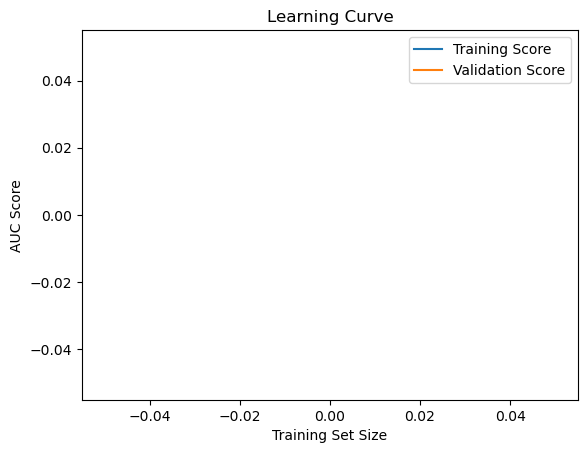

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
import xgboost as xgb

# Load and preprocess data
target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
xgb_model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Combine models in a VotingClassifier (hard voting for class labels, soft voting for probabilities)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('logistic', logistic_model),
        ('rf', rf_model)
    ],
    voting='hard'  # Use 'soft' for probabilities or 'hard' for majority voting
)

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = ensemble_model.predict(X_train)
y_pred_test = ensemble_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Ensemble Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Ensemble Model: {test_accuracy:.4f}")

# Calculate AUC
y_pred_prob_train = ensemble_model.predict(X_train)
y_pred_prob_test = ensemble_model.predict(X_test)

train_auc = roc_auc_score(y_train, y_pred_prob_train)
test_auc = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


# SVC

Training Accuracy: 0.9847
Test Accuracy: 0.8788
Train AUC: 0.9998
Test AUC: 0.8560


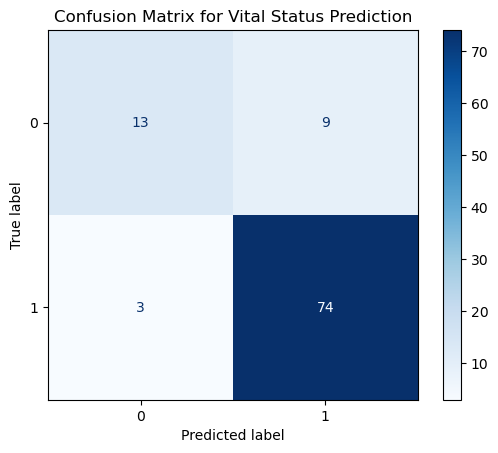

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
model = SVC(kernel='rbf', C=10, probability=True, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# For ROC-AUC, we need probabilities
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy: 0.9184
Test Accuracy: 0.9091
Train AUC: 0.9292
Test AUC: 0.8890


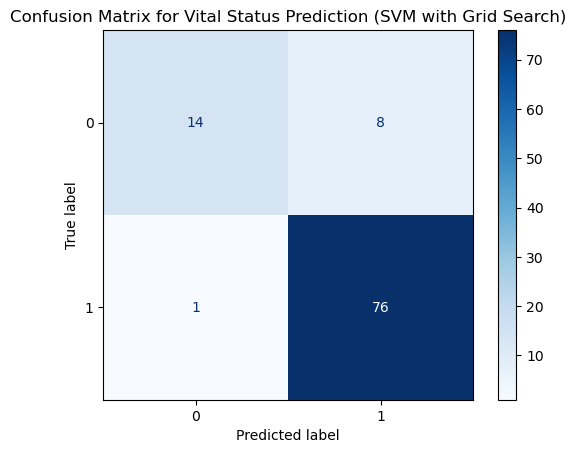

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
model = SVC(probability=True, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf', 'poly'
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# For ROC-AUC, we need probabilities
train_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction (SVM with Grid Search)')
plt.show()


# Gaussian Naive Bayes

Training Accuracy: 0.8444
Test Accuracy: 0.8384
Train AUC: 0.8941
Test AUC: 0.8754


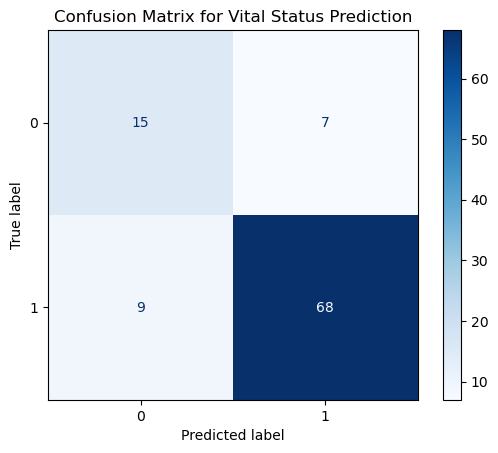

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Split data
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional, depending on the nature of features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict on train and test sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate AUC score (for binary classification)
if len(y.unique()) == 2:  # Ensure it's a binary classification problem
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"Train AUC: {train_auc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Vital Status Prediction')
plt.show()


C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of Hard Voting Classifier: 1.0000
Test Accuracy of Hard Voting Classifier: 0.9192

Confusion Matrix:
[[14  8]
 [ 0 77]]


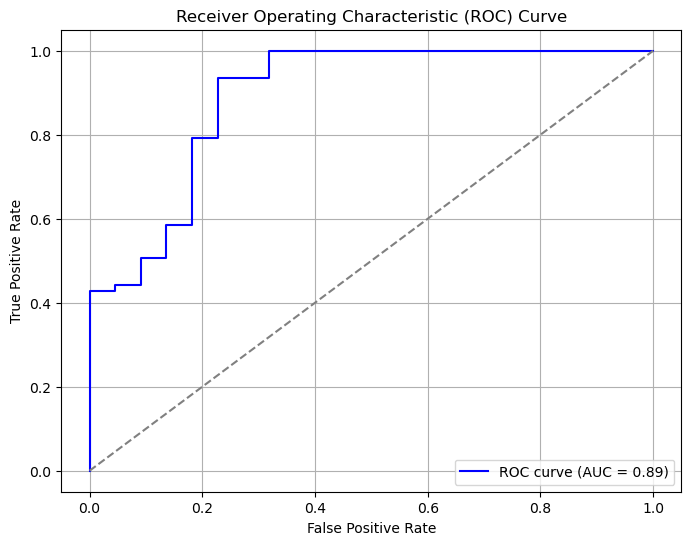

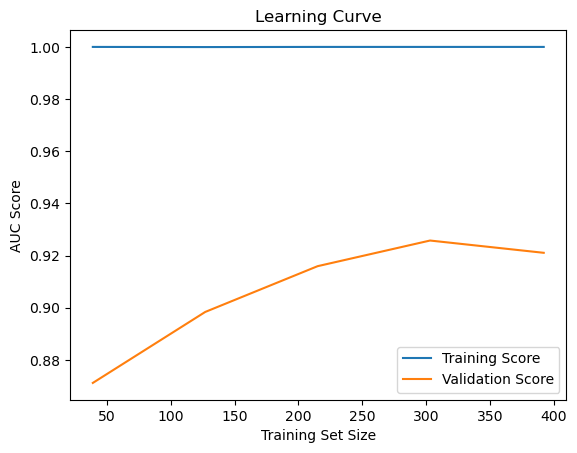

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Prepare the dataset
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
xgb_model = XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create a hard voting classifier
hard_voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lr', lr_model)
    ],
    voting='hard'  # Hard voting
)

# Train the hard voting ensemble
hard_voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_train = hard_voting_clf.predict(X_train)
y_pred_test = hard_voting_clf.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Hard Voting Classifier: {train_accuracy:.4f}")
print(f"Test Accuracy of Hard Voting Classifier: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
# Prepare the dataset
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
xgb_model = xgb.XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
catboost_model = CatBoostClassifier(iterations=100, verbose=0, random_seed=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Combine models in a VotingClassifier (hard voting)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('logistic', logistic_model),
        ('rf', rf_model),
        ('catboost', catboost_model),
        ('knn', knn_model)
    ],
    voting='hard'  # Hard voting for majority voting
)


# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = ensemble_model.predict(X_train)
y_pred_test = ensemble_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Ensemble Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Ensemble Model: {test_accuracy:.4f}")

# Calculate AUC
y_pred_prob_train = ensemble_model.predict_proba(X_train)[:, 1]
y_pred_prob_test = ensemble_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_prob_train)
test_auc = roc_auc_score(y_test, y_pred_prob_test)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(ensemble_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Training Accuracy of Ensemble Model: 0.9745
Test Accuracy of Ensemble Model: 0.9091


AttributeError: This 'VotingClassifier' has no attribute 'predict_proba'

Training Accuracy of MLP Model: 0.8087
Test Accuracy of MLP Model: 0.7677
Train AUC: 0.8757
Test AUC: 0.7249


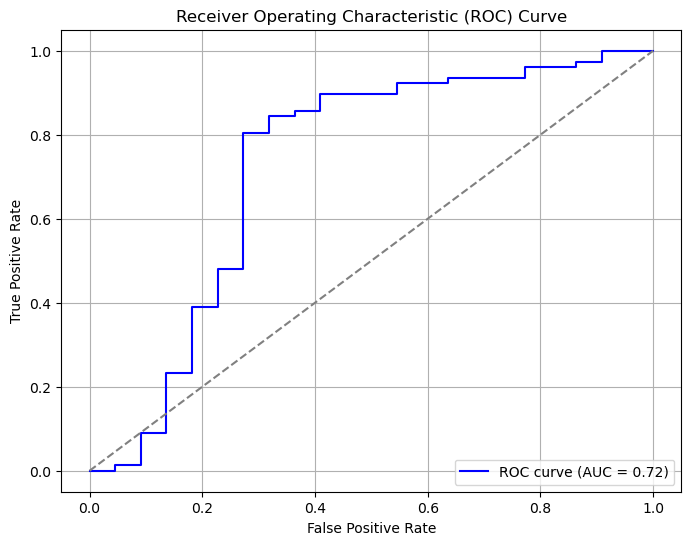

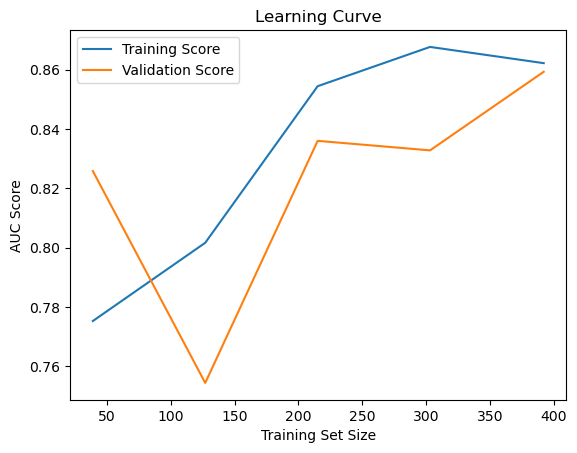

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
import pandas as pd
import matplotlib.pyplot as plt

target_column = 'Vital status'

# Splitting data into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of MLP Model: {train_accuracy:.4f}")
print(f"Test Accuracy of MLP Model: {test_accuracy:.4f}")

# AUC Scores
y_pred_train_prob = mlp_model.predict_proba(X_train)[:, 1]
y_pred_test_prob = mlp_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_train_prob)
test_auc = roc_auc_score(y_test, y_pred_test_prob)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\abeya\anaconda3\envs\si670\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'sgd'}
Training Accuracy: 0.9643
Test Accuracy: 0.8889
Train AUC: 0.9841
Test AUC: 0.8784


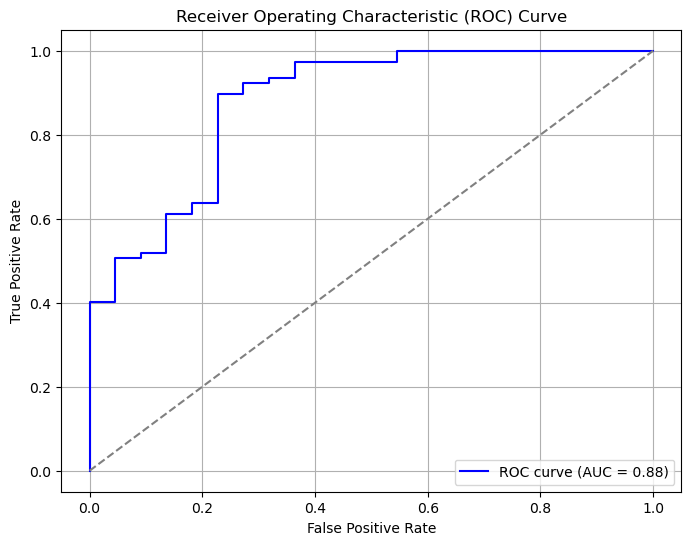

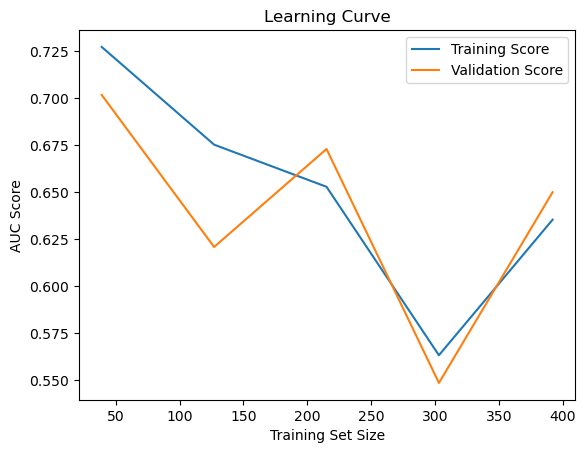

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import pandas as pd
import matplotlib.pyplot as plt

# Define target and features
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (150, 75)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Grid search for the best model
grid_search = GridSearchCV(
    MLPClassifier(max_iter=300, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Training and test predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# AUC Scores
y_pred_train_prob = best_model.predict_proba(X_train)[:, 1]
y_pred_test_prob = best_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_train_prob)
test_auc = roc_auc_score(y_test, y_pred_test_prob)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Training Accuracy: 0.8878
Test Accuracy: 0.8485
Train AUC: 0.9334
Test AUC: 0.8772


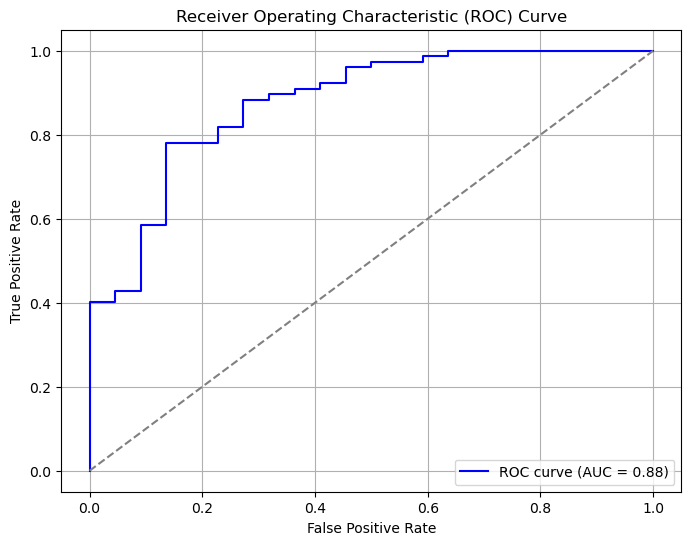

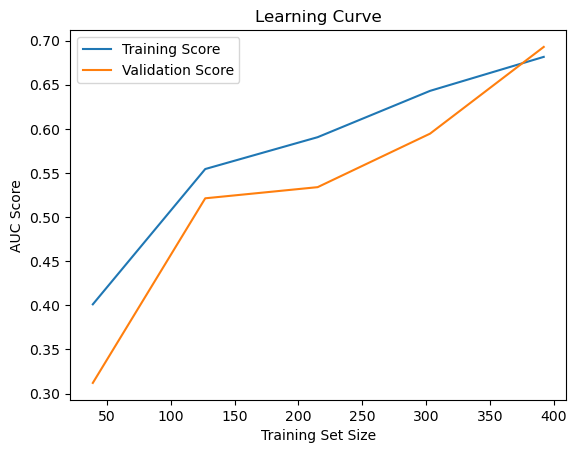

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, learning_curve
import pandas as pd
import matplotlib.pyplot as plt

# Define target and features
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Updated MLP Model with additional layers, higher alpha, and early stopping
mlp_model = MLPClassifier(
    hidden_layer_sizes=(150, 75),
    activation='tanh',
    solver='sgd',
    alpha=0.001,  # Increased regularization
    learning_rate_init=0.01,
    max_iter=500,
    early_stopping=True,  # Stops if validation score doesn’t improve
    random_state=42
)

# Train the model
mlp_model.fit(X_train, y_train)

# Training and test predictions
y_pred_train = mlp_model.predict(X_train)
y_pred_test = mlp_model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# AUC Scores
y_pred_train_prob = mlp_model.predict_proba(X_train)[:, 1]
y_pred_test_prob = mlp_model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_train_prob)
test_auc = roc_auc_score(y_test, y_pred_test_prob)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(mlp_model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Training Accuracy: 0.8776
Test Accuracy: 0.8687
Train AUC: 0.9497
Test AUC: 0.7406


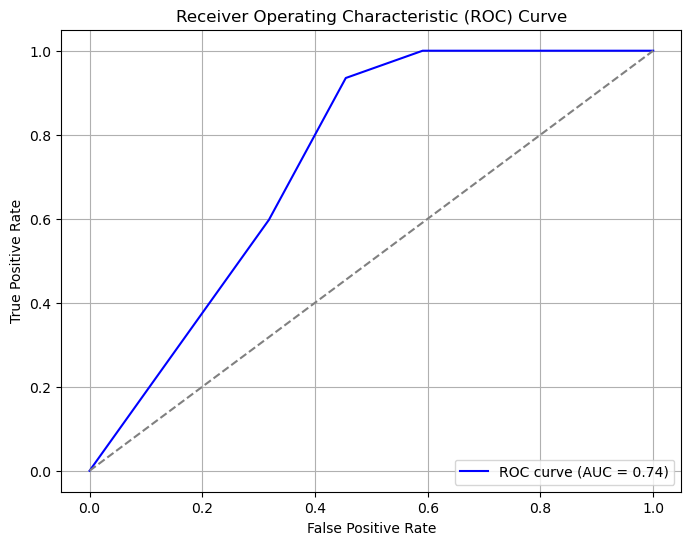

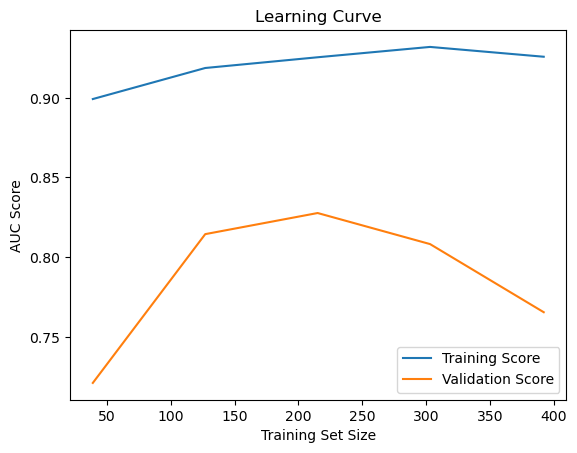

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import pandas as pd
import matplotlib.pyplot as plt

# Define target and features
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan (p=1) and Euclidean (p=2) distances
}

# Grid search for the best KNN model
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Training and test predictions
y_pred_train = best_knn.predict(X_train)
y_pred_test = best_knn.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# AUC Scores
y_pred_train_prob = best_knn.predict_proba(X_train)[:, 1]
y_pred_test_prob = best_knn.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_pred_train_prob)
test_auc = roc_auc_score(y_test, y_pred_test_prob)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_knn, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()


Confusion Matrix:
[[ 9 13]
 [ 0 77]]


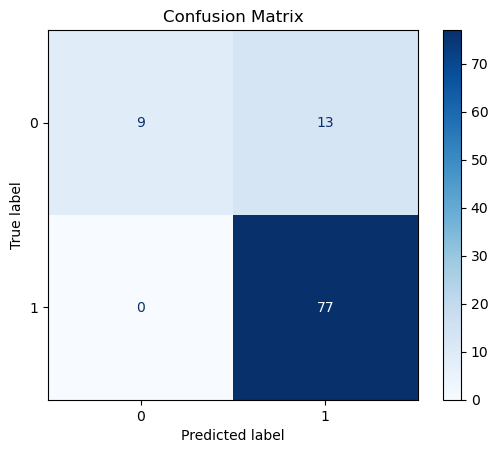

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()